In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
%matplotlib inline

In [2]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
world_cups = pd.read_csv('WorldCups.csv')
players = pd.read_csv('WorldCupPlayers.csv')
matches = pd.read_csv('WorldCupMatches.csv')

In [4]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [5]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning


In [7]:
matches.dropna(subset = ['Year'], inplace = True)

In [8]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [9]:
matches['Home Team Name'].value_counts()

Brazil                      82
Italy                       57
Argentina                   54
Germany FR                  43
England                     35
                            ..
Iran                         1
Wales                        1
rn">United Arab Emirates     1
IR Iran                      1
China PR                     1
Name: Home Team Name, Length: 78, dtype: int64

In [10]:
matches[matches['Home Team Name'].str.contains('rn">')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
414,1990.0,09 Jun 1990 - 17:00,Group D,Renato Dall Ara,Bologna,"rn"">United Arab Emirates",0.0,2.0,Colombia,,30791.0,0.0,0.0,COURTNEY George (ENG),TAKADA Shizuo (JPN),SNODDY Alan (NIR),322.0,119.0,UAE,COL
433,1990.0,17 Jun 1990 - 17:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",0.0,0.0,Egypt,,33288.0,0.0,0.0,VAN LANGENHOVE Marcel (BEL),QUINIOU Joel (FRA),LO BELLO Rosario (ITA),322.0,152.0,IRL,EGY
446,1990.0,21 Jun 1990 - 21:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",1.0,1.0,Netherlands,,33288.0,0.0,1.0,VAUTROT Michel (FRA),LORENC Richard (AUS),HANSAL Mohamed (ALG),322.0,228.0,IRL,NED
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),31818.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU
492,1994.0,28 Jun 1994 - 12:30,Group E,Giants Stadium,New York/New Jersey,"rn"">Republic of Ireland",0.0,0.0,Norway,,72404.0,0.0,0.0,TORRES CADENA Jose Joaquin (COL),ALVES Paulo Jorge (BRA),PARK Hae-Yong (KOR),337.0,3077.0,IRL,NOR
582,2002.0,01 Jun 2002 - 15:30,Group E,Niigata Stadium Big Swan,Niigata,"rn"">Republic of Ireland",1.0,1.0,Cameroon,,33679.0,0.0,1.0,KAMIKAWA Toru (JPN),AWANG HAMAT Mat Lazim (MAS),VAN NYLEN Roland (BEL),43950100.0,43950002.0,IRL,CMR
647,2006.0,10 Jun 2006 - 18:00,Group B,"FIFA World Cup Stadium, Dortmund",Dortmund,"rn"">Trinidad and Tobago",0.0,0.0,Sweden,,62959.0,0.0,0.0,MAIDIN Shamsul (SIN),PERMPANICH Prachya (THA),GHULOUM Eisa (UAE),97410100.0,97410004.0,TRI,SWE
649,2006.0,11 Jun 2006 - 15:00,Group C,Zentralstadion,Leipzig,"rn"">Serbia and Montenegro",0.0,1.0,Netherlands,,43000.0,0.0,1.0,MERK Markus (GER),SCHRAER Christian (GER),SALVER Jan-Hendrik (GER),97410100.0,97410006.0,SCG,NED
813,2014.0,25 Jun 2014 - 13:00,Group F,Arena Fonte Nova,Salvador,"rn"">Bosnia and Herzegovina",3.0,1.0,IR Iran,,48011.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255931.0,300186464.0,BIH,IRN


In [11]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Serbia and Montenegro     1
rn">Bosnia and Herzegovina    1
rn">Trinidad and Tobago       1
rn">United Arab Emirates      1
Name: Home Team Name, dtype: int64

In [12]:
names.index

Index(['rn">Republic of Ireland', 'rn">Serbia and Montenegro',
       'rn">Bosnia and Herzegovina', 'rn">Trinidad and Tobago',
       'rn">United Arab Emirates'],
      dtype='object')

In [13]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">Trinidad and Tobago',
 'rn">United Arab Emirates']

In [14]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Trinidad and Tobago',
 'United Arab Emirates']

In [71]:
old = ['Germany FR', 'Marcan? - Est?dio Jornalistra M?rio Filho', 'Estadio Maracana']
new = ['Germany', 'Marcana Stadium', 'Marcana Stadium']

In [72]:
wrong = wrong + old
correct = correct + new

In [73]:
for index, wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

In [74]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

### Most number of world cup titles

In [19]:
winner = world_cups['Winner'].value_counts()

In [20]:
winner

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [21]:
runnerup = world_cups['Runners-Up'].value_counts()
runnerup

Germany           4
Netherlands       3
Argentina         3
Czechoslovakia    2
Italy             2
Hungary           2
Brazil            2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [22]:
third = world_cups['Third'].value_counts()
third

Germany        4
Brazil         2
Sweden         2
France         2
Poland         2
Italy          1
USA            1
Chile          1
Netherlands    1
Austria        1
Portugal       1
Turkey         1
Croatia        1
Name: Third, dtype: int64

In [23]:
teams = pd.concat([winner, runnerup, third], axis = 1)
teams.fillna(0, inplace = True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [24]:
teams.iplot(kind = 'bar', xTitle = 'Teams', yTitle = 'Count', title = 'FIFA World Cup WInning COunt')

### Number of goal per country

In [25]:
home = matches[['Home Team Name','Home Team Goals']].dropna()
away = matches[['Away Team Name','Away Team Goals']].dropna()
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [26]:
home.columns = ['Countries', 'Goals']
away.columns = ['Countries', 'Goals']

In [27]:
goals = home.append(away, ignore_index = True)

In [28]:
goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [29]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [30]:
goals = goals.sort_values(by = 'Goals',ascending = False)
goals

,Goals
Countries,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


In [31]:
goals[:20].iplot(kind = 'bar', xTitle= 'Country Names', yTitle = 'Goals', title = 'Most goals per country top 20')

### Attendence , number of teams, goals and matches per cup

In [32]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549


In [33]:
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.','')

In [34]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


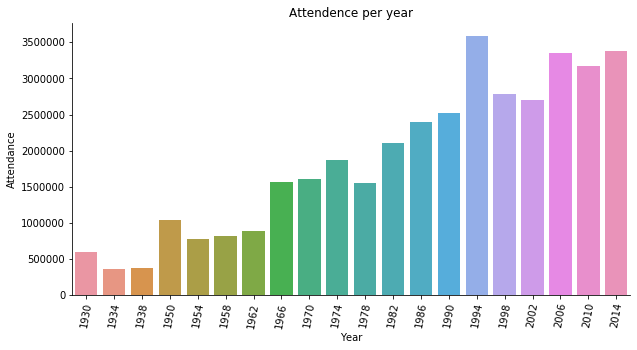

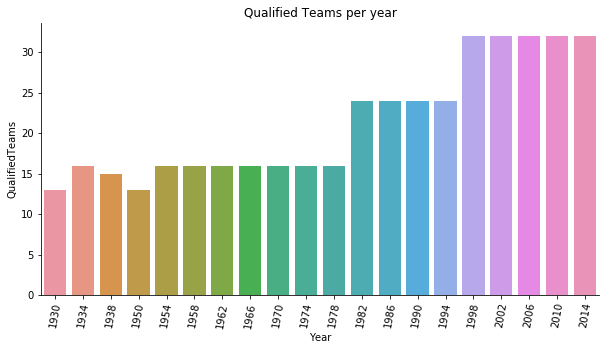

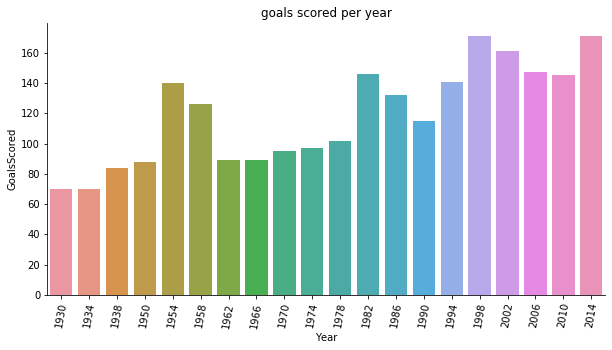

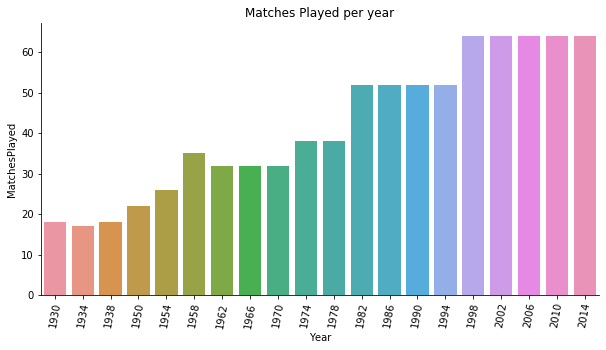

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendence per year')

#------------------------

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams per year')

#------------------------

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('goals scored per year')

#-----------------------

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Played per year')
plt.show()

### Goals per team per world cup

In [36]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [37]:
home = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [38]:
away = matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [39]:
goals = pd.concat([home, away], axis = 1)
goals

Home Team Goals  Away Team Goals
1930.0 Argentina               16.0              2.0
       Belgium                  NaN              0.0
       Bolivia                  NaN              0.0
       Brazil                   4.0              1.0
       Chile                    4.0              1.0
...                             ...              ...
2014.0 Russia                   1.0              1.0
       Spain                    1.0              3.0
       Switzerland              4.0              3.0
       USA                      2.0              4.0
       Uruguay                  3.0              1.0

[427 rows x 2 columns]

In [40]:
goals.fillna(0, inplace = True)

In [41]:
goals

Home Team Goals  Away Team Goals
1930.0 Argentina               16.0              2.0
       Belgium                  0.0              0.0
       Bolivia                  0.0              0.0
       Brazil                   4.0              1.0
       Chile                    4.0              1.0
...                             ...              ...
2014.0 Russia                   1.0              1.0
       Spain                    1.0              3.0
       Switzerland              4.0              3.0
       USA                      2.0              4.0
       Uruguay                  3.0              1.0

[427 rows x 2 columns]

In [42]:
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']

In [43]:
goals

Home Team Goals  Away Team Goals  Goals
1930.0 Argentina               16.0              2.0   18.0
       Belgium                  0.0              0.0    0.0
       Bolivia                  0.0              0.0    0.0
       Brazil                   4.0              1.0    5.0
       Chile                    4.0              1.0    5.0
...                             ...              ...    ...
2014.0 Russia                   1.0              1.0    2.0
       Spain                    1.0              3.0    4.0
       Switzerland              4.0              3.0    7.0
       USA                      2.0              4.0    6.0
       Uruguay                  3.0              1.0    4.0

[427 rows x 3 columns]

In [44]:
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)

In [45]:
goals

Goals
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [46]:
goals = goals.reset_index()

In [47]:
goals

,level_0,level_1,Goals
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
...,...,...,...
422,2014.0,Russia,2.0
423,2014.0,Spain,4.0
424,2014.0,Switzerland,7.0
425,2014.0,USA,6.0


In [48]:
goals.columns = ['Year', 'Country', 'Goals']

In [49]:
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
...,...,...,...
422,2014.0,Russia,2.0
423,2014.0,Spain,4.0
424,2014.0,Switzerland,7.0
425,2014.0,USA,6.0


In [50]:
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True,False])

In [51]:
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [52]:
top5 = goals.groupby('Year').head(5)

In [53]:
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [54]:
import plotly.graph_objects as go

In [55]:
x,y = goals['Year'].values, goals['Goals'].values

In [56]:
data = []

In [57]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
    
layout = go.Layout(barmode = 'stack', title = 'Top 5 teams with the most goals', showlegend = False)

fig = go.Figure( data = data, layout = layout)
fig.show()

### Matches with highest number of Attendance

In [59]:
matches.head(1
            )

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [60]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [61]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %Y'))

In [62]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [80]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]

In [81]:
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,"16 Jul, 1950",Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950.0,"13 Jul, 1950",Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950.0,"01 Jul, 1950",Group 1,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950.0,"09 Jul, 1950",Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
379,1986.0,"07 Jun, 1986",Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR
411,1986.0,"29 Jun, 1986",Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany,,114600.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG
397,1986.0,"15 Jun, 1986",Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,114580.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL
407,1986.0,"22 Jun, 1986",Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,114580.0,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG
409,1986.0,"25 Jun, 1986",Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,114500.0,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL
367,1986.0,"03 Jun, 1986",Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,110000.0,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX


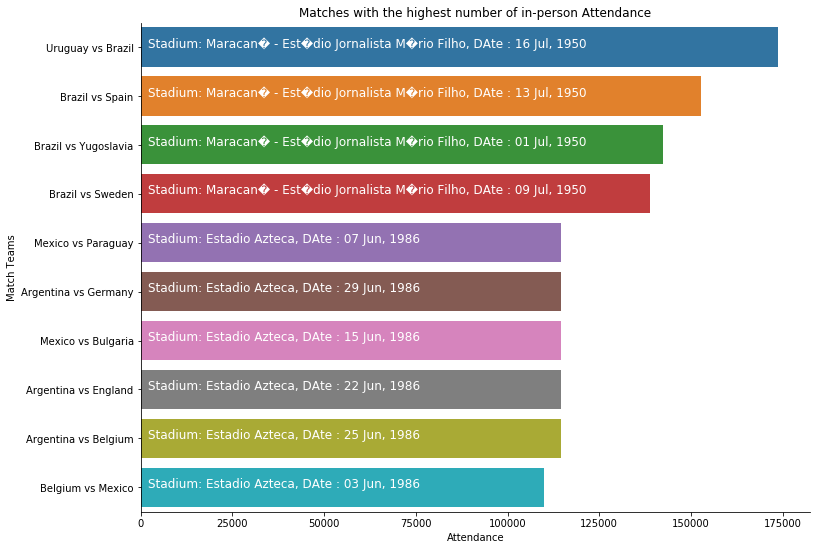

In [87]:
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']
plt.figure(figsize = (12,9))
ax= sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)
plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title('Matches with the highest number of in-person Attendance')

for i, s in enumerate("Stadium: " + top10['Stadium'] + ", DAte : " + top10['Datetime']):
    ax.text(2000,i,s,fontsize = 12, color = 'white')
plt.show()

In [88]:
matches['City'].value_counts()[:20].iplot(kind = 'bar')

In [89]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [90]:
matches['outcomes'] = matches.apply(lambda x: get_labels(x), axis = 1)

In [91]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930.0,"13 Jul, 1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team Win


In [94]:
plt.figure(figsize = (6,10))
mt = matches['outcomes'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcomes, dtype: int64

<Figure size 432x720 with 0 Axes>

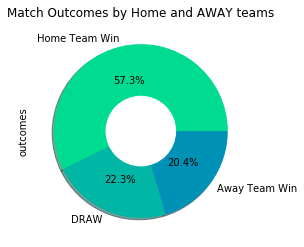

In [101]:
mt.plot.pie(autopct = '%0.1f%%', colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color = 'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and AWAY teams')
plt.show()